In [2]:
import numpy as np
from scipy import stats

def ridge(X,Y,lamb):
    
#     """"
#     find out proper linear transformation from X to Y using ridge regression.
    
#     - loss function : ||Y-XB||_2 + lamb*||B||_2
#     ===========================================
#     - Input:
#     X : m by n array
#     Y : length m vector array
#     lamb : float
    
#     - Output:
#     B : length n vector array
#     ===========================================
#     """"
    
    # Normalization
    X = stats.zscore(X, axis=0, ddof=1)
    X = np.matrix(X).T
    Y = np.matrix(Y).T
    Y_m = np.mean(Y)
    print(Y_m)
    Y = Y - Y_m
    print(X.shape)
    print(X.T@Y)
    
    B = np.linalg.inv(X.T@X +lamb*np.identity(X.shape[1]))*X.T@Y
    
    
    return B

In [3]:
import pandas as pd
archive =pd.read_csv('archive.csv')

In [4]:
co2 = archive['Carbon Dioxide (ppm)']

In [5]:
co2[0:6]

0       NaN
1       NaN
2    315.69
3    317.45
4    317.50
5       NaN
Name: Carbon Dioxide (ppm), dtype: float64

In [6]:
w_s = 7
for i in range(len(co2)):
    window = co2[i:i+6]
    

In [7]:
co2

0         NaN
1         NaN
2      315.69
3      317.45
4      317.50
        ...  
715       NaN
716       NaN
717       NaN
718       NaN
719       NaN
Name: Carbon Dioxide (ppm), Length: 720, dtype: float64

In [8]:
co2 = co2.dropna()

In [9]:
x = co2.index

In [10]:
x

Int64Index([  2,   3,   4,   6,   7,   8,  10,  11,  12,  13,
            ...
            700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
           dtype='int64', length=703)

In [11]:
y = np.array(co2)

In [12]:
len(x)

703

In [13]:
len(y)

703

In [14]:
np.mean(y)

352.3756330014225

In [15]:
80/700

0.11428571428571428

Text(0, 0.5, 'CO2(ppm)')

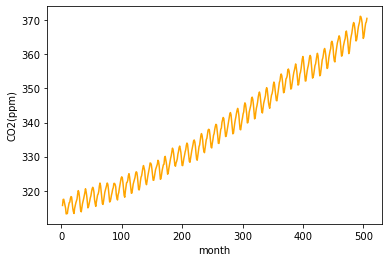

In [19]:
import matplotlib.pyplot as plt
plt.plot(x[0:500],y[0:500],color='orange')
plt.xlabel('month')
plt.ylabel('CO2(ppm)')

In [ ]:
np.matrix(x[:500]).shape

In [18]:
x_z = stats.zscore(x[:500], axis=0, ddof=1)

In [19]:
import statistics
x_s = statistics.stdev(x[:500])

In [20]:
type(x)

pandas.core.indexes.numeric.Int64Index

In [22]:
B = ridge(x[:500],y[:500],1)

338.5888
(500, 1)
[[7982.17375969]]


In [23]:
np.matrix(x[:500]).T.shape

(500, 1)

In [25]:
B

matrix([[15.96434752]])

In [26]:
x

Int64Index([  2,   3,   4,   6,   7,   8,  10,  11,  12,  13,
            ...
            700, 701, 702, 703, 704, 705, 706, 707, 708, 709],
           dtype='int64', length=703)

In [1]:

plt.plot(x,y)

NameError: name 'plt' is not defined

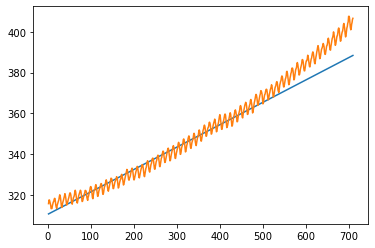

In [30]:
plt.plot(x,B[0,0]*x_z+np.mean(y[:500]))
plt.plot(x,y)

In [31]:
Y_pre = B[0,0]*x_z+np.mean(y[:500])

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y[500:], Y_pre[500:])

In [34]:
mse

102.18560682391528

In [29]:
x_z= (x - np.mean(x[:500]))/x_s

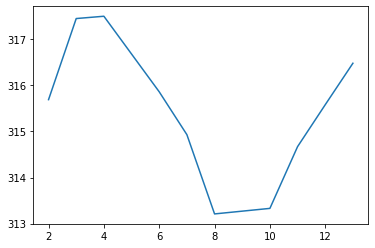

In [227]:
plt.plot(x[:10],y[:10])

In [ ]:
plt.plot(x,B[0,0]*x_z+np.mean(y[:500]))
plt.plot(x,y)

In [94]:
B

79.82173759692998

# Sklearn

In [114]:
from sklearn import linear_model

In [183]:
clf = linear_model.Ridge(alpha=1)

In [124]:
np.array(x[:500]).reshape(-1,1)

array([[  2],
       [  3],
       [  4],
       [  6],
       [  7],
       [  8],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
       [ 76],
       [ 77],
      

In [130]:
np.mean(y[:500])

338.5888

In [184]:
clf.fit(np.array(x[:500]).reshape(-1,1),y[:500])

Ridge(alpha=1)

In [241]:
clf.coef_

array([0.11021762])

In [127]:
clf.intercept_

310.36559364821596

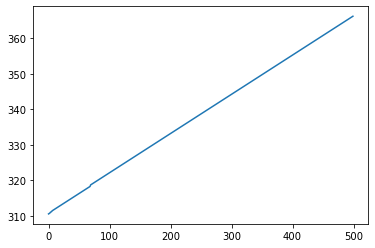

In [132]:
plt.plot(x[:500]*clf.coef_+clf.intercept_)